In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import scipy.stats as ss
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('MOCK_DATA.csv')
data = df.Production9 #replace X with your designated number on the exam sheet

In [4]:
X = np.array([data])

In [7]:
X_avg = np.average(X)
print(X_avg)

509.022


In [8]:
s_2 = np.var(X, ddof = 1)
print(s_2)

812.706222222


In [9]:
s = np.std(X, ddof = 1)
print(s)

28.508002775


In [10]:
median = np.median(X)
print(median)

509.0


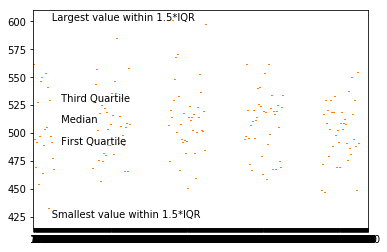

In [13]:
plt.boxplot(X)
plt.annotate('      Largest value within 1.5*IQR',[1,np.max(X)])
plt.annotate('         Third Quartile',[1,np.percentile(X, 75)])
plt.annotate('         First Quartile',[1,np.percentile(X, 25)])
plt.annotate('         Median',[1,np.median(X)])
plt.annotate('      Smallest value within 1.5*IQR',[1,np.min(X)])
plt.show()

In [34]:
X_outliers = np.append(X,600)

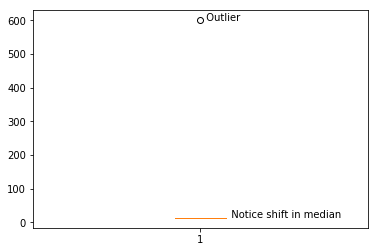

In [35]:
plt.boxplot(X_outliers)
plt.annotate('  Outlier',[1,np.max(X_outliers)])
plt.annotate('          Notice shift in median',[1,np.median(X_outliers)])
plt.show()

In [37]:
np.median(X_outliers)-np.median(X)

0.050000000000000711

In [17]:
k = 3
n = 9
perms = np.math.factorial(n)/np.math.factorial(n-k)
print(perms)

504.0


In [19]:
combs = np.math.factorial(n)/(np.math.factorial(k)*np.math.factorial(n-k))
print(combs)

84.0


In [20]:
n = 9
k = 1
prob = 100*k/n
print(prob)

11.11111111111111


In [22]:
n = 9
k = 3
prob = 100*k/n
print(prob)

33.333333333333336


In [23]:
n = 120
X = 8.3
sd = 0.4
ss.norm.interval(.95, loc=X, scale=sd/np.sqrt(n))

(8.228432234251315, 8.3715677657486864)

In [24]:
ss.norm.interval(.99, loc=X, scale=sd/np.sqrt(n))

(8.2059440124108978, 8.3940559875891037)

In [26]:
ci = 8.57
z_sig = ci - X
z = z_sig*np.sqrt(n)/sd
1-(1-ss.norm.cdf(z))*2

0.99999999999985789

In [27]:
z_sig = 0.07
z = ss.norm.ppf(.975)
n = (z*sd/z_sig)**2
print(np.ceil(n))

126.0


In [28]:
z = ss.norm.ppf(.995)
n = (z*sd/z_sig)**2
print(np.ceil(n))

217.0


In [29]:
n = 80
X = 42

def binom_CI(n,X,alpha):
    n_hat = n+4
    p_hat = (X+2) / n_hat
    
    z = ss.norm.ppf(1-alpha/2)
    
    ci = z*np.sqrt(p_hat*(1-p_hat)/n_hat)

    return np.array([p_hat-ci, p_hat+ci])


alpha = 1 - 0.95
binom_CI(n,X,alpha)

array([ 0.41700602,  0.63061303])

In [30]:
alpha = 1 - 0.9
binom_CI(n,X,alpha)

array([ 0.4341772 ,  0.61344185])

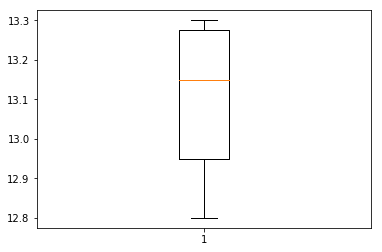

In [31]:
X = np.array([13.1,13.3,12.9,12.8,13.2,13.3])
plt.boxplot(X)
plt.show()

In [32]:
n = len(X)
mean = np.mean(X)
sd = np.std(X)
df = n-1
alpha = 0.95
ss.t.interval(alpha, df, mean, ss.sem(X))

(12.879868522974609, 13.32013147702539)